# This is an experimental test post
Here I will occasionally edit to test new functionality. Not to be read. 

## Matplotlib plots

In [1]:
# Imports
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### KDE plots

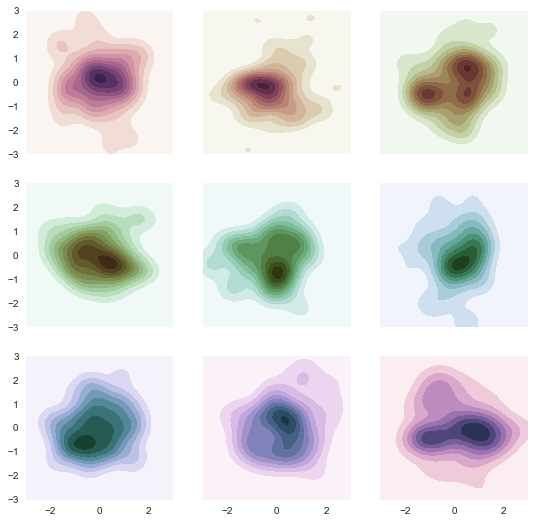

In [2]:
# Using a seaborn cubehelix kde example
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.show()

### Timeseries plots

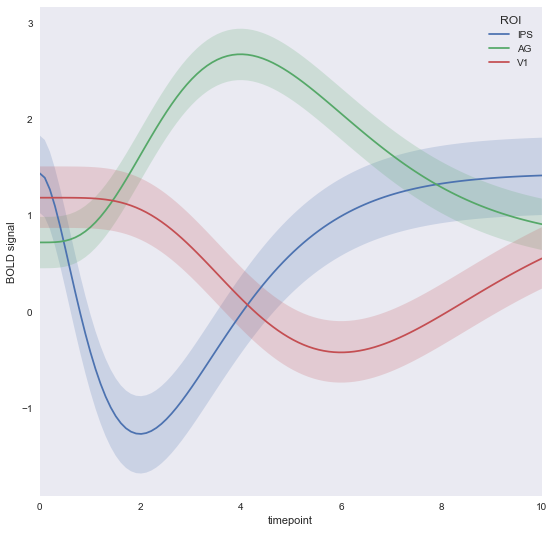

In [3]:
# Using seaborn timeseries example
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal")
fig = plt.gcf()
fig.set_figheight(9)
fig.set_figwidth(9)

## Bokeh Plots

### Texas plots

In [10]:
! mkdir bokeh_files

In [11]:
# Using the texas example
from bokeh.io import save
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

save(p,'./bokeh_files/texas.html',)

'/home/paul/Documents/Personal/pkairys.github.io/_posts/2018-02-07-Experimental-Post/bokeh_files/texas.html'

{{ "assets/2018-02-07-Experimental-Post/texas.html" | absolute }}

### Lorenz attractor plot

In [12]:
# Using the lorenz attractor example
import numpy as np
from scipy.integrate import odeint
from bokeh.plotting import figure, show, output_file

sigma = 10
rho = 28
beta = 8.0/3
theta = 3 * np.pi / 4

def lorenz(xyz, t):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = x * rho - x * z - y
    z_dot = x * y - beta* z
    return [x_dot, y_dot, z_dot]

initial = (-10, -7, 35)
t = np.arange(0, 100, 0.006)

solution = odeint(lorenz, initial, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]
xprime = np.cos(theta) * x - np.sin(theta) * y

colors = ["#C6DBEF", "#9ECAE1", "#6BAED6", "#4292C6", "#2171B5", "#08519C", "#08306B",]

p = figure(title="lorenz example" )

p.multi_line(np.array_split(xprime, 7), np.array_split(z, 7),
             line_color=colors, line_alpha=0.8, line_width=1.5)

save(p,'./bokeh_files/lorenz.html')  # open a browser

'/home/paul/Documents/Personal/pkairys.github.io/_posts/2018-02-07-Experimental-Post/bokeh_files/lorenz.html'

{{ "assets/2018-02-07-Experimental-Post/lorenz.html" | absolute }}

## Math

$$ \frac{\pi}{e} = \alpha $$